<a href="https://colab.research.google.com/github/shuvoedward/Machine-learning/blob/master/random_forest%2Cdecision_tree/loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
# importing the data
import io
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [9]:
# reading in the data
loans_data = pd.read_csv(io.StringIO(uploaded['loan_data.csv'].decode('utf-8')), sep=',')

In [10]:
loans_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
loans_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


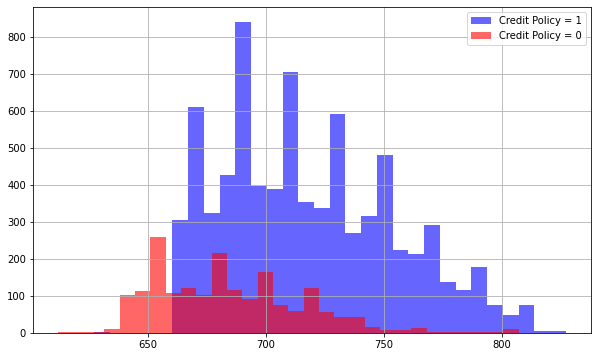

In [13]:
#
# Data visualization
#

plt.figure(figsize=(10,6))

loans_data[loans_data['credit.policy']==1]['fico'].hist(color='blue', bins=30, 
                                                        alpha=0.6,
                                                        label='Credit Policy = 1')

loans_data[loans_data['credit.policy']==0]['fico'].hist(color='red', bins=30, 
                                                        alpha=0.6,
                                                        label='Credit Policy = 0')
plt.legend()


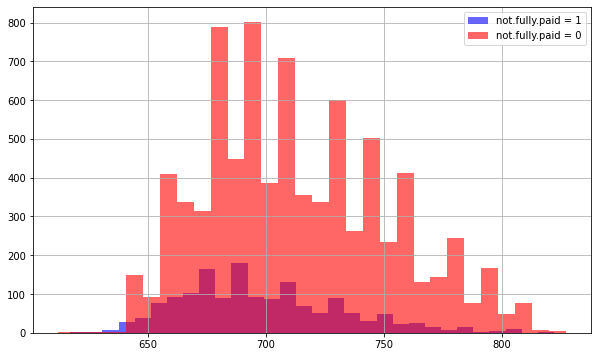

In [14]:
#
# Data visualization
#

plt.figure(figsize=(10,6))

loans_data[loans_data['not.fully.paid']==1]['fico'].hist(color='blue', bins=30, 
                                                        alpha=0.6,
                                                        label='not.fully.paid = 1')

loans_data[loans_data['not.fully.paid']==0]['fico'].hist(color='red', bins=30, 
                                                        alpha=0.6,
                                                        label='not.fully.paid = 0')
plt.legend()


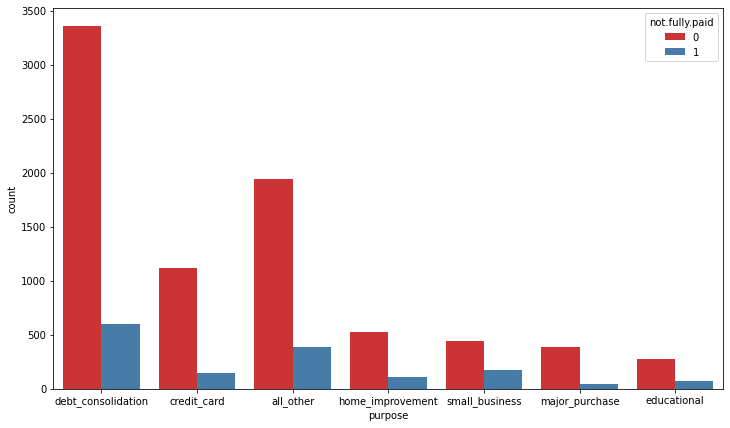

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(x='purpose', hue='not.fully.paid',data=loans_data,palette='Set1')

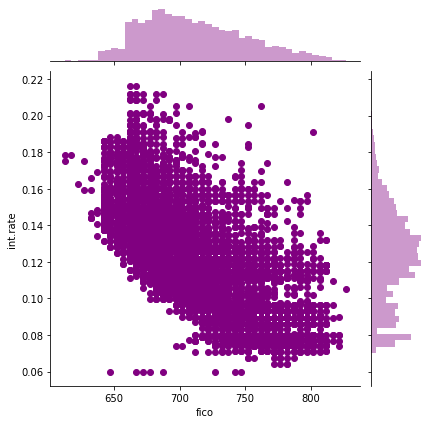

In [16]:
sns.jointplot('fico', 'int.rate',data=loans_data,color='purple')

<Figure size 792x504 with 0 Axes>

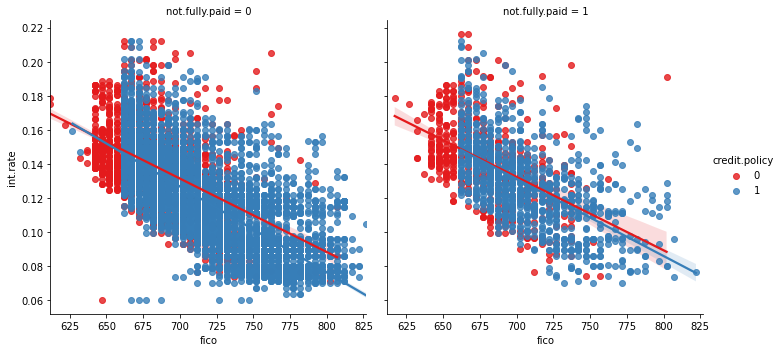

In [17]:
plt.figure(figsize=(11,7))
sns.lmplot('fico','int.rate',data=loans_data,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [19]:
# transforming the purpose column
# purpose is a categorical column, using the get_dummies method of pandas 

feats = ['purpose']

final_data = pd.get_dummies(loans_data,columns=feats,drop_first=True)

final_data.head()

# now can use the purpose columns in training

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [23]:
#
# training and testing the data
# Decision tree

X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [24]:
# creatign an instance
d_tree = DecisionTreeClassifier()

# fitting the data
d_tree.fit(X_train, y_train)

#predicting the data
predict = d_tree.predict(X_test)

print(classification_report(y_test, predict))
print('\n')
print(confusion_matrix(y_test, predict))


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2434
           1       0.19      0.22      0.20       440

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.74      0.74      2874



[[2018  416]
 [ 345   95]]


In [25]:
final_data['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [27]:
#
# Random Forest
#

rfc = RandomForestClassifier(n_estimators=300)

rfc.fit(X_train, y_train)

prediction = rfc.predict(X_test)


print(confusion_matrix(y_test, prediction))

[[2407   27]
 [ 430   10]]


In [28]:
print(classification_report(y_test, prediction))
#print('\n')

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2434
           1       0.27      0.02      0.04       440

    accuracy                           0.84      2874
   macro avg       0.56      0.51      0.48      2874
weighted avg       0.76      0.84      0.78      2874

